Saving img5.jpeg to img5.jpeg


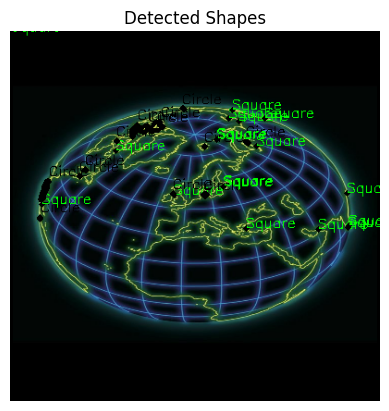

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.resize(img, (400, 400))

# Step 2: Preprocessing
blur = cv2.GaussianBlur(img, (5, 5), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Step 3: Find contours
contours, hierarchy = cv2.findContours(dilate.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 3)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        ar = float(w) / h
        if 0.95 <= ar <= 1.05:
            cv2.putText(img, "Square", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        else:
            cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    elif len(approx) > 5:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Step 4: Display result in Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detected Shapes")
plt.show()
